# Milestone 2 - Matthew Currie
## Analyzing Health and Costs using the Medical_Cost dataset

In [1]:
# Relative Importing of Data
import sys
sys.path.append("../scripts")
from project_functions import load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../../data/raw/Medical_Cost.csv"

### Analyzing the Health and Medical Costs of Men with children v. Men without children

We want to create two data frames for comparison: `with_children` and `without_children`. But first, let's set some parameters for the men we want to compare as to narrow down potential variables.

 - Everyone should be in the age range of 25 to 50 (inclusive).
   - This is to limit how much of a factor age is in our comparison
 - Everyone should not be a smoker
   - This is to prevent any smoking related health differences from efffecting our comparison
   
Since the fields `sex` and `smoker` are going to be the same for everyone, we can drop these two fields from our DataFrame.

In [2]:
params = {
    'is_male' : True,
    'older_than' : 24,
    'younger_than' : 51,
    'no_smokers' : True,
    'reset_index' : True,
    'drop' : ['sex', 'smoker']
}

with_children = load_data(
    DATA_PATH,
    has_children=True,
    **params
)

no_children = load_data(
    DATA_PATH,
    has_children=False,
    **params
)

print("Sample of Men with Children")
print(with_children.sample(5))
print('--------------------------------------------------')
print("Sample of Men without Children")
print(no_children.sample(5))

Sample of Men with Children
     age    bmi  children     region    charges age_category bmi_category  \
0     25  25.84         1  northeast  3309.7926        17-25         over   
123   41  34.21         1  southeast  6289.7549        40-55        obese   
150   44  21.85         3  northeast  8891.1395        40-55      healthy   
134   42  37.18         2  southeast  7162.0122        40-55        obese   
188   49  25.84         1  northeast  9282.4806        40-55         over   

    cost_category  
0      $0-$10,000  
123    $0-$10,000  
150    $0-$10,000  
134    $0-$10,000  
188    $0-$10,000  
--------------------------------------------------
Sample of Men without Children
    age     bmi  children     region      charges age_category bmi_category  \
10   27  23.100         0  southeast   2483.73600        25-40      healthy   
36   37  36.190         0  southeast  19214.70553        25-40        obese   
51   45  39.805         0  northeast   7448.40395        40-55        

### Analyzing the distribution of the data

Let's plot the count of the ages on a graph to make sure their distributions are close enough to validly compare.

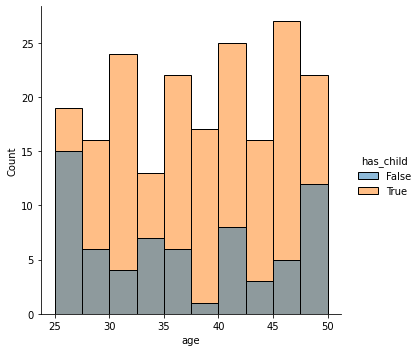

In [3]:
data = with_children[['age', 'children']].append(no_children[['age', 'children']])
data['has_child'] = data['children'] > 0

ax = sns.displot(data, x='age', hue='has_child')

### O no! It seems like there is not enough data about men without children to come to any firm conclusions.

Looks like we will have to free up our memory and start ananlyzing something else.
<!-- I spent so long on this plot it really makes me kind of sad that I don't have the data to do this analysis -->

In [4]:
# Free up memory to help with Python's performance
import gc

del with_children
del no_children
del data
gc.collect()

109

## Lets get a high level look at our data and what trends may be immediately apparent

First, lets get a plain copy of our dataset to look through

In [5]:
df = load_data(
    DATA_PATH
)

Now lets use a _pair plot_ to plot each variable against each other. Chances are that we will learn some quirks about our data.

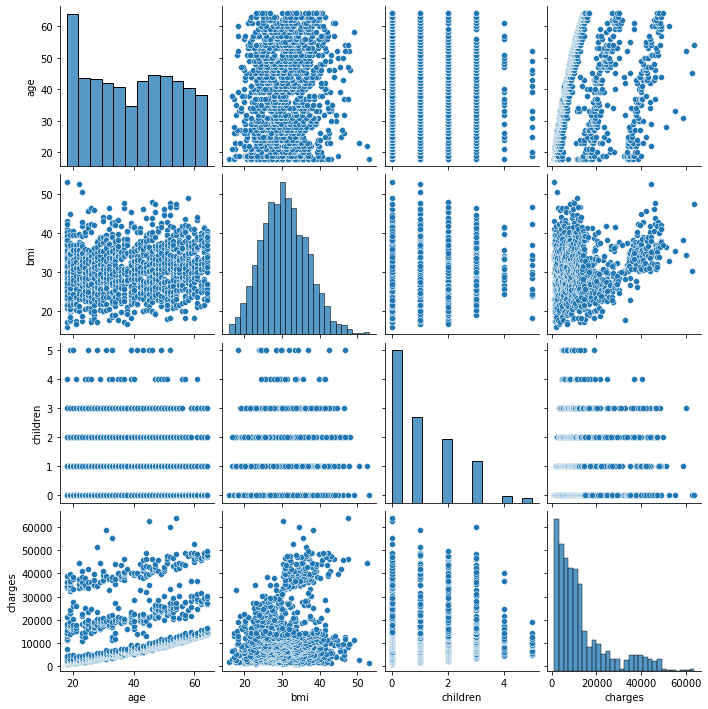

In [6]:
sns.pairplot(df)

Looks a little overwhelming doesn't it? That's okay, we can break it down graph by graph.

On the diagnal is the distribution of each part of the data. 

--------------

__Age__: The age spread seems to be spread evenly among age groups, just with a notably higher amount of youth than other.

__BMI__: The BMI is normally distributed as we would expect.

__Children__: Looking at the graph alone, we could reasonably guess that there is slightly more rows of people with children than without children in the thread.

__Charges__: The distribution of charges makes sense from what we know about health care in the US. Jokes aside, the graph shows that the count of costs decreases as the cost rises. This makes sense intuitively.

--------------

__Other Notes__

* The Chart of BMI to cost seems to reveal a cluster of data points that have both a high cost and high BMI.

* As the Age-Charge graph shows that there seems to be a linear increase in the lowest charges for each age group.

* The Child-Charge doesn't show as much as one might have guessed, this should be looked more into it.

* There may be a trend in that a higher amount of children is correlated with a higher average BMI.

* The Density of points makes it hard to decipher if there are any correlations with age and BMI.

In [7]:
smokers = load_data(
    DATA_PATH,
    only_smokers=True
)

non_smokers = load_data(
    DATA_PATH,
    no_smokers=True
)
# check that there is enough rows to compare
print(smokers.info())
print('-------')
print(non_smokers.info())

# Remove DataFrames that I will not be using
del smokers
del non_smokers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 250 to 1241
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            274 non-null    int64   
 1   sex            274 non-null    object  
 2   bmi            274 non-null    float64 
 3   children       274 non-null    int64   
 4   smoker         274 non-null    object  
 5   region         274 non-null    object  
 6   charges        274 non-null    float64 
 7   age_category   274 non-null    category
 8   bmi_category   253 non-null    category
 9   cost_category  274 non-null    category
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 15.0+ KB
None
-------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 940 to 62
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1064 non-null   int64   
 1   sex            1

Looks like there is enough data to make a meaningful comparison

Let's create a function to create 3 bins for our ages: Young \[18,40); Middle Aged \[40,60\]; Old (60,beyond)

In [8]:
def age_bin(age):
    if age < 40:
        return "Young"
    elif age <= 60:
        return "Middle Aged"
    else:
        return "Old"

<ipython-input-9-72abd96ed2a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_smoker'] = data['smoker'].map(smoker)
<ipython-input-9-72abd96ed2a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_bin'] = data['age'].map(age_bin)


<AxesSubplot:xlabel='age_bin', ylabel='charges'>

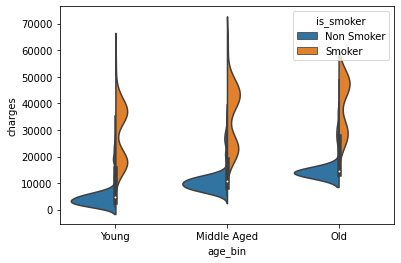

In [9]:
data = df[['age', 'charges', 'smoker']]
smoker = {'yes':'Smoker', 'no':'Non Smoker'} # used for clarity on the graph
data['is_smoker'] = data['smoker'].map(smoker)
data['age_bin'] = data['age'].map(age_bin)


sns.violinplot(data=data, x='age_bin', y='charges', hue='is_smoker', split=True)

What the above violin plot shows is that there is a correlation between age and medical cost. Furthermore, it also demonstrates that smokers pay significantly more in medical costs than nonsmokers.

The fact that smokers pay more makes sense intuitively. Comorbidities is something that develops from tabaco use. This then leads to an increase in likelihood of developing illness. And, of course, illness will increase one's medical costs. Plus, American insurance companies make smokers pay a premium for their health care.

### Looking at how sex determines medical costs

First let's get some numbers

In [10]:
group_sex = df.groupby('sex')
group_smoker = df.groupby('smoker')
group_region = df.groupby('region')

group_sex.bmi.agg(["mean", "median", "std", "min", "max"])

,mean,median,std,min,max
sex,,,,,
female,30.377749,30.1075,6.046023,16.815,48.07
male,30.943129,30.6875,6.140435,15.960,53.13


<AxesSubplot:xlabel='bmi_category', ylabel='count'>

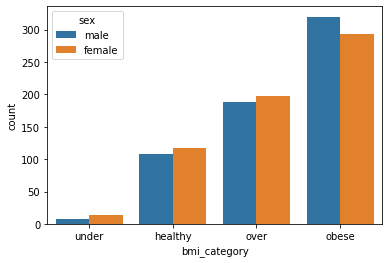

In [11]:
sns.countplot(data=df, x='bmi_category', hue='sex')

__BMI__: It seems that BMI is pretty similar between the two, with men having a slightly greater spread. It is kind of crazy how may people are considered obese however.

In [12]:
group_sex.charges.agg(["mean", "median", "std", "min", "max"])

,mean,median,std,min,max
sex,,,,,
female,12569.578844,9412.96250,11128.703801,1607.5101,63770.42801
male,13956.751178,9369.61575,12971.025915,1121.8739,62592.87309


__Charges__: On average it seems that Men have higher medical charges than women. Interestingly, however, is that the standard deviation for men is signifcantly high than that for women. 

Let's plot these together and see if we can see this visually.

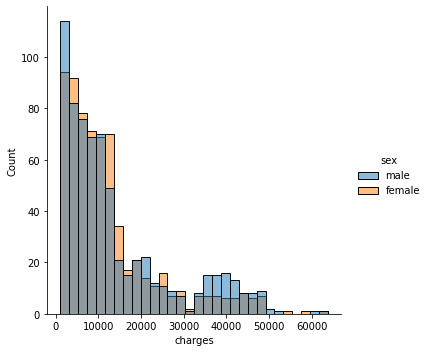

In [13]:
sns.displot(data=df, x='charges', hue='sex')

Interesting! You can see where the greater variance in men. There is a significant number of men that are paying low costs, but there is also a sizeable amount of men that are paying very high costs (>$30,000). As was illustrated above, these high costs are associated with smoking, so I would be willing to be that there are a higher number of male smokers than female smokers.

Let's see how this looks by comparing region instead of sex.

In [14]:
group_region.charges.agg(["mean", "median", "std", "min", "max"])

,mean,median,std,min,max
region,,,,,
northeast,13406.384516,10057.652025,11255.803066,1694.7964,58571.07448
northwest,12417.575374,8965.795750,11072.276928,1621.3402,60021.39897
southeast,14735.411438,9294.131950,13971.098589,1121.8739,63770.42801
southwest,12346.937377,8798.593000,11557.179101,1241.5650,52590.82939


Region looks like it makes a suprisingly large difference. The southeast has an incredibly high average cost but also the greatest standard deviation. This contrasts with the northeast's high costs and lower standard deviation.

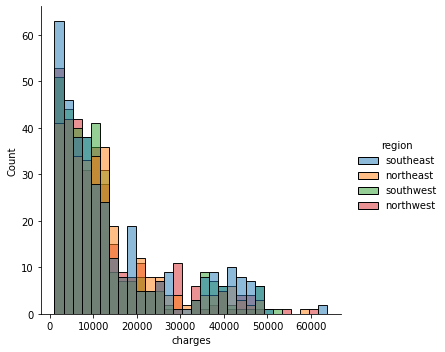

In [15]:
sns.displot(data=df, x='charges', hue='region')

Well that is a lot of overlap, lets try using another plot to visualize this.

c:\users\matth\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\matth\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\users\matth\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for k

<AxesSubplot:ylabel='Density'>

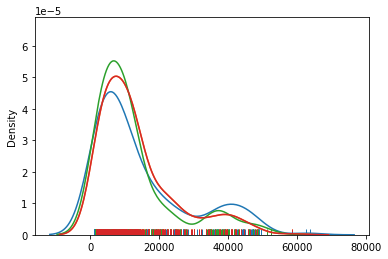

In [16]:
se = df.loc[df['region'] == 'southeast',['charges']]
ne = df.loc[df['region'] == 'northeast',['charges']]
sw = df.loc[df['region'] == 'southwest',['charges']]
nw = df.loc[df['region'] == 'northeast',['charges']]

sns.distplot(se, hist=False, rug=True)
sns.distplot(ne, hist=False, rug=True)
sns.distplot(sw, hist=False, rug=True)
sns.distplot(nw, hist=False, rug=True)

What this illustrates is that all of the regions have a similar trend in that there is a rise in $40,000 dollar cost. Which comes presumably from smokers. 

Let's see how BMI, age, and smoking are distributed by region. This may indicate why some regions have higher medical costs than others. 

<AxesSubplot:xlabel='region', ylabel='count'>

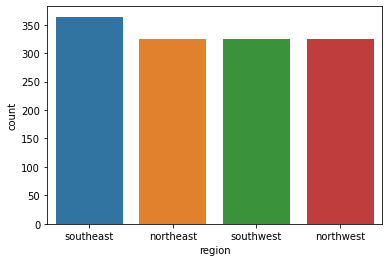

In [17]:
sns.countplot(data=df, x='region')

Looks like we have a fairly even spread among the regions. This is good as it means we have a good enough sample size to make comparisons.

<AxesSubplot:xlabel='bmi_category', ylabel='count'>

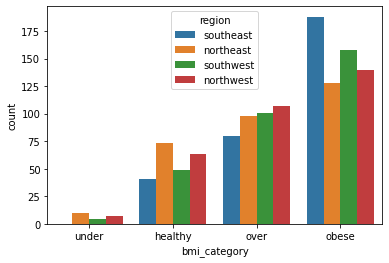

In [18]:
sns.countplot(data=df, x='bmi_category', hue='region')

Seems like the southeast has significantly less people in healthy BMI ranges which would probably lead to the skew we saw above.

<AxesSubplot:xlabel='age_category', ylabel='count'>

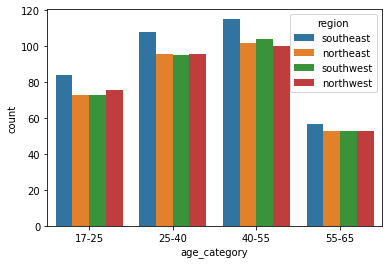

In [19]:
sns.countplot(data=df, x='age_category', hue='region')

All of the regions seem to have an even spread of age so that is good

<AxesSubplot:xlabel='smoker', ylabel='count'>

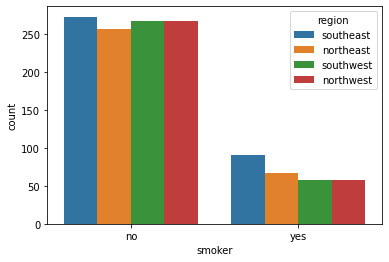

In [20]:
sns.countplot(data=df, x='smoker', hue='region')

It looks like the southeast also has the highest number of smokers, which would only further their cost. 
In addition, the northeast has both less nonsmokers and more smokers than either area in the west. This could also be an explanation why the north east had somewhat higher costs than expected.